In [21]:
import csv
import torch
from torch import functional as F
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [22]:
loss_scaling = "run-8192 octants l=4 rgb final 2_val-tag-loss_camera.csv"
loss_no_scaling = "run-8192 octants l=4 rgb final no_rescaling_val-tag-loss_camera.csv"

loss_norm = pd.read_csv(loss_scaling)

loss_no_norm = pd.read_csv(loss_no_scaling)


loss_norm.shape, loss_no_norm.shape

((1000, 3), (1000, 3))

In [ ]:
pd.DataFrame(loss_norm)

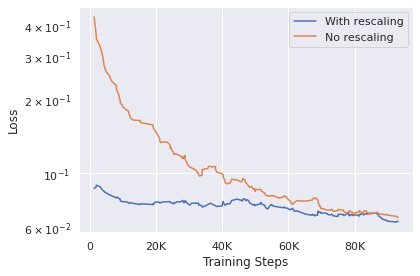

In [55]:
plt.plot(loss_norm["Step"][:200],loss_norm["Value"].ewm(alpha=(1 - 0.9)).mean()[:200],label="With rescaling")
plt.plot(loss_no_norm["Step"][:200],loss_no_norm["Value"].ewm(alpha=(1 - 0.9)).mean()[:200],label="No rescaling")
plt.yscale("log")
plt.gca().get_xaxis().set_major_formatter(lambda x,y:f"{int(x/1000)}K" if x > 0 else "0")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.tight_layout()
plt.savefig("loss_comparison.pdf",dpi=300)